# 第4章 PandasとMatplotlibを使ってみよう
## 4.1 データのダウンロード

In [18]:
import pandas_datareader.data as web
start="1949/5/16"
end="2016/9/30"#適当に入れ替えてください。
N225 = web.DataReader("NIKKEI225", 'fred',start,end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [19]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


Text(0,0.5,'N225 index')

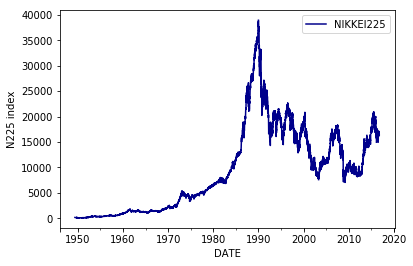

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

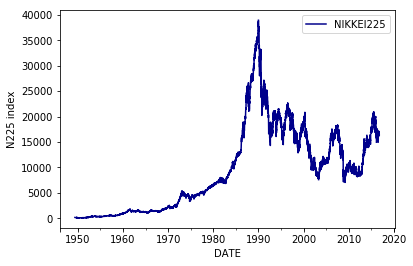

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')
plt.show()

plt.show()を追加することにより出力の仕方が変わりました。

In [22]:
price = web.DataReader("aapl", 'yahoo',"1990/1/4",end)#yahooのサービスの停止により変更
price.head(1)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1990-01-03,1.357143,1.339286,1.357143,1.339286,51998800.0,0.123341


In [23]:
print(price.tail(1))

                  High         Low        Open       Close      Volume  \
Date                                                                     
2016-09-30  113.370003  111.800003  112.459999  113.050003  36379100.0   

             Adj Close  
Date                    
2016-09-30  109.055237  


## 4.2 データベースの加工

Text(0,0.5,'correlation')

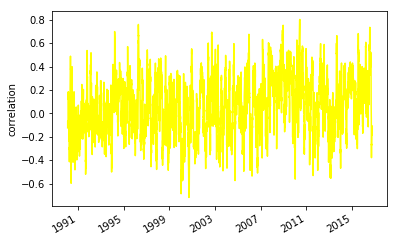

In [24]:
import pandas as pd
fx = web.DataReader('DEXJPUS',"fred",start,end)
port=pd.concat([price.Close,fx],axis=1).dropna()
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

                  High         Low        Open       Close      Volume  \
Date                                                                     
2015-01-02  111.440002  107.349998  111.389999  109.330002  53204600.0   
2015-01-05  108.650002  105.410004  108.290001  106.250000  64285500.0   

             Adj Close  
Date                    
2015-01-02  101.963631  
2015-01-05   99.091148  


Text(0,0.5,'apple')

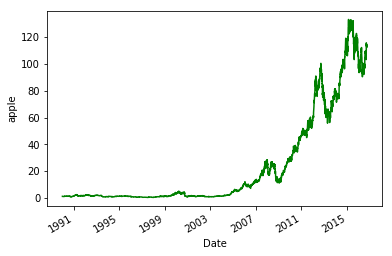

In [25]:
price = web.DataReader("aapl", 'yahoo','1990/1/1',end)#yahooのサービスの停止により変更
price1=price.loc["1990/1/1":]#ixの停止によりlocに変更
price1.Close.plot(color='green')
price2=price["2015"].iloc[0:2]#ixの停止によりilocに変更
print(price2)
plt.ylabel('apple')

In [26]:
print(price.resample('M').first().tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2016-05-31   94.080002   92.400002   93.970001   93.639999  48160100.0   
2016-06-30   99.540001   98.330002   99.019997   98.459999  29173300.0   
2016-07-31   96.470001   95.330002   95.489998   95.889999  26026500.0   
2016-08-31  106.150002  104.410004  104.410004  106.050003  38167900.0   
2016-09-30  106.800003  105.620003  106.139999  106.730003  26701500.0   

             Adj Close  
Date                    
2016-05-31   89.300697  
2016-06-30   94.469025  
2016-07-31   92.003212  
2016-08-31  101.751366  
2016-09-30  102.958557  


In [27]:
print(price.resample('M').last().tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2016-05-31  100.400002   98.820000   99.599998   99.860001  42307200.0   
2016-06-30   95.769997   94.300003   94.440002   95.599998  35836400.0   
2016-07-31  104.550003  103.680000  104.190002  104.209999  27733700.0   
2016-08-31  106.570000  105.639999  105.660004  106.099998  29662400.0   
2016-09-30  113.370003  111.800003  112.459999  113.050003  36379100.0   

             Adj Close  
Date                    
2016-05-31   95.812286  
2016-06-30   91.724960  
2016-07-31   99.985970  
2016-08-31  102.350830  
2016-09-30  109.055237  


In [28]:
print(price.resample('M',loffset='1d').last().tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2016-06-01  100.400002   98.820000   99.599998   99.860001  42307200.0   
2016-07-01   95.769997   94.300003   94.440002   95.599998  35836400.0   
2016-08-01  104.550003  103.680000  104.190002  104.209999  27733700.0   
2016-09-01  106.570000  105.639999  105.660004  106.099998  29662400.0   
2016-10-01  113.370003  111.800003  112.459999  113.050003  36379100.0   

             Adj Close  
Date                    
2016-06-01   95.812286  
2016-07-01   91.724960  
2016-08-01   99.985970  
2016-09-01  102.350830  
2016-10-01  109.055237  


Text(0,0.5,'apple')

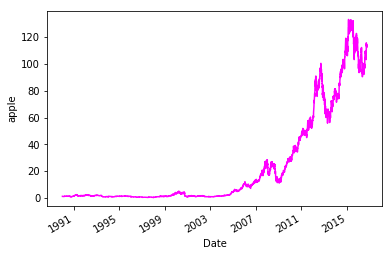

In [29]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel('apple')

## 4.3 データの加工、分析


In [30]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol,len(price))

(0.46553884922098926, 6742)


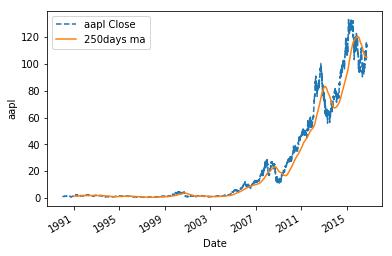

In [31]:
import pandas as pd
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='aapl Close',style='--')
ma.plot(label='250days ma')
plt.ylabel('aapl')
plt.legend()

Text(0,0.5,'standrd deviation 250 days aapl')

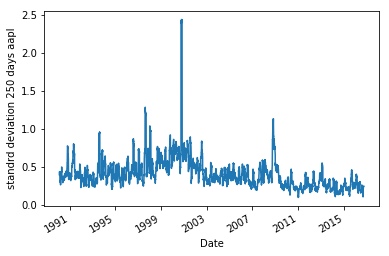

In [32]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=25).std()*np.sqrt(250)).plot()
plt.ylabel('standrd deviation 250 days aapl')